In [1]:
import keras
import numpy as np
import cnn_utils as utils
from keras import backend as K
from keras.datasets import cifar10
from keras.models import Sequential
from keras import regularizers, optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
np.random.seed(42)

%matplotlib inline

Using TensorFlow backend.


In [1]:
! pip install keras


     |████████████████████████████████| 317kB 731kB/s eta 0:00:01
     |████████████████████████████████| 51kB 2.9MB/s eta 0:00:011
     |████████████████████████████████| 51kB 3.5MB/s eta 0:00:011


In [3]:
! pip install tensorflow

     |████████████████████████████████| 109.2MB 441kB/s eta 0:00:01
     |████████████████████████████████| 3.2MB 74kB/s eta 0:00:015
     |████████████████████████████████| 1.2MB 237kB/s eta 0:00:01
     |████████████████████████████████| 102kB 2.4MB/s ta 0:00:011
     |████████████████████████████████| 491kB 174kB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 2.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 2.9MB/s eta 0:00:01
     |████████████████████████████████| 92kB 2.6MB/s eta 0:00:011
  Stored in directory: /home/aashirwad/.cache/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: /home/aashirwad/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: /home/aashirwad/.cache/pip/wheels/ee/98/38/46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
Successfully built termcolor gast absl-py


In [2]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 50
INPUT_SHAPE = (32, 32, 3)
WEIGHT_DECAY = 1e-4
KFOLD_WEIGHT_PATH=r'cnn_cifar10_weights_{epoch:02d}_{val_acc:.2f}.hdf5'

In [3]:
label_dict = {0:'airplane',
             1:'automobile',
             2:'bird',
             3:'cat',
             4:'deer',
             5:'dog',
             6:'frog',
             7:'horse',
             8:'ship',
             9:'truck'}

# for evaluation
TOP_N = 1

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/255.
x_test = x_test/255.

In [0]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [0]:
%%capture
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=INPUT_SHAPE))

model.add(Conv2D(32, (3,3), padding='same', 
                kernel_regularizer=regularizers.l2(WEIGHT_DECAY),
                activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               921728    
__________

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

W0811 11:11:04.086220 139952029886336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
early_stop_callback = [EarlyStopping(monitor='val_loss', 
                                     patience=10, verbose=0),
                       ModelCheckpoint(KFOLD_WEIGHT_PATH, 
                                       monitor='val_loss', 
                                       save_best_only=True, 
                                       verbose=0),
                      ]

In [0]:
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    callbacks=early_stop_callback)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 4s 95us/step - loss: 0.4872 - acc: 0.8320 - val_loss: 1.1041 - val_acc: 0.7170
Epoch 2/50
45000/45000 [==============================] - 4s 92us/step - loss: 0.4817 - acc: 0.8347 - val_loss: 1.1714 - val_acc: 0.7024
Epoch 3/50
45000/45000 [==============================] - 4s 92us/step - loss: 0.4827 - acc: 0.8353 - val_loss: 1.2526 - val_acc: 0.7012
Epoch 4/50
45000/45000 [==============================] - 4s 92us/step - loss: 0.4757 - acc: 0.8387 - val_loss: 1.3204 - val_acc: 0.7084
Epoch 5/50
45000/45000 [==============================] - 4s 92us/step - loss: 0.4663 - acc: 0.8430 - val_loss: 1.4512 - val_acc: 0.7162
Epoch 6/50
45000/45000 [==============================] - 4s 92us/step - loss: 0.4587 - acc: 0.8440 - val_loss: 1.2395 - val_acc: 0.7120
Epoch 7/50
45000/45000 [==============================] - 4s 91us/step - loss: 0.4554 - acc: 0.8454 - val_loss: 2.3677 - val_acc:

In [0]:
model.save(filepath=r'cnn_cifar10.h5')

In [0]:
score = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 94us/step


In [0]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.705226103591919
Test accuracy: 0.703


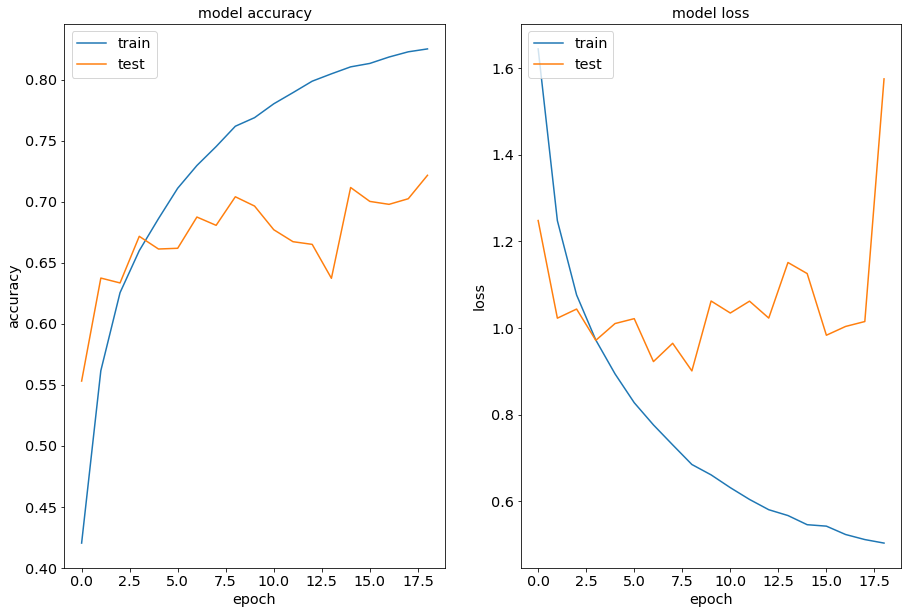

In [0]:
plt.figure(1,figsize=(15,10))  

# summarize history for accuracy  

plt.subplot(121)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

# summarize history for loss  

plt.subplot(122)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

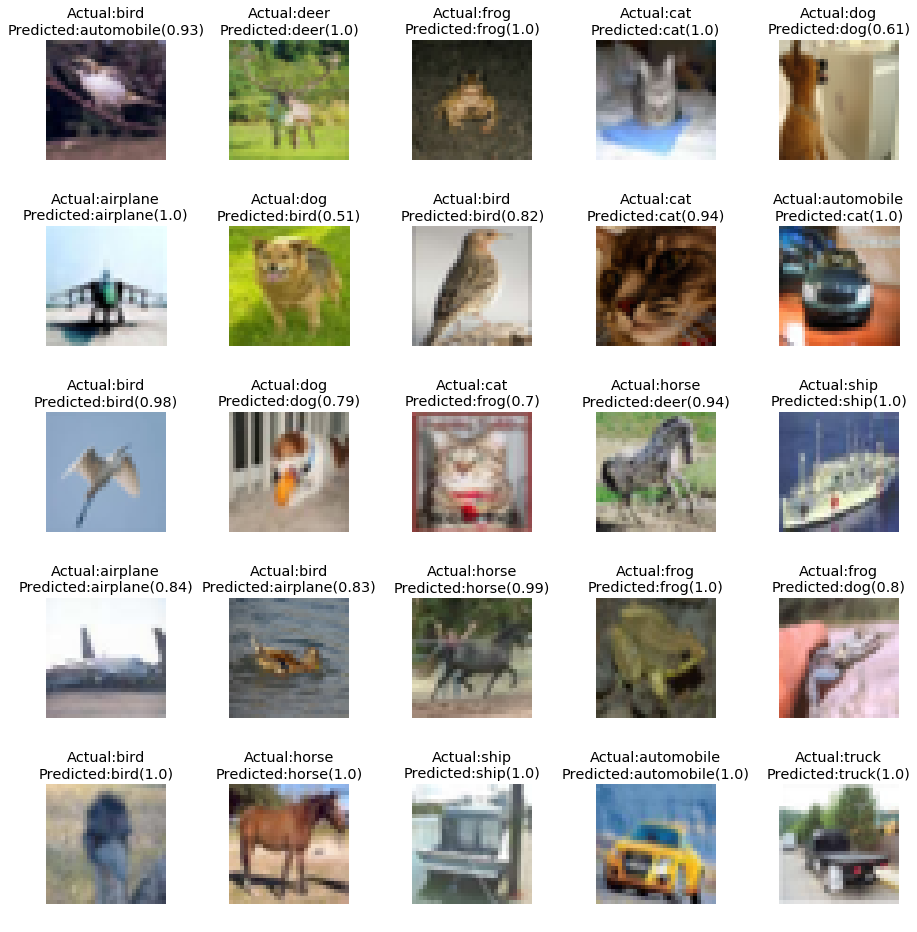

In [0]:
utils.plot_predictions(model=model,dataset=x_test,
                       dataset_labels=y_test,
                       label_dict=label_dict,
                       batch_size=25,
                       grid_height=5,
                       grid_width=5)

----- activations -----
(1, 30, 30, 16)
(1, 30, 30, 32)
(1, 30, 30, 32)
(1, 15, 15, 32)
(1, 15, 15, 32)
(1, 7200)
(1, 128)
(1, 128)
(1, 10)
Displaying activation map 0


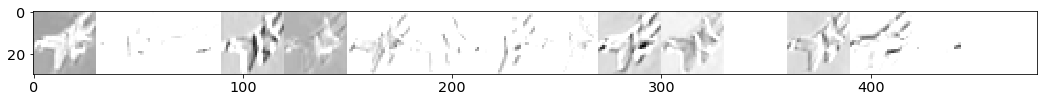

Displaying activation map 1


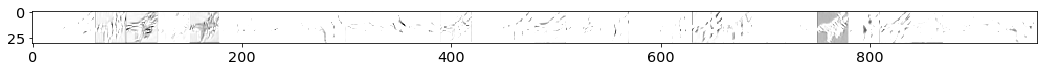

Displaying activation map 2


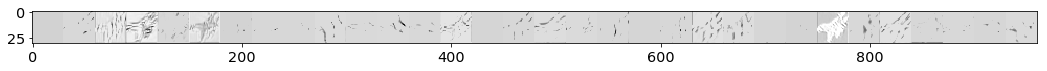

Displaying activation map 3


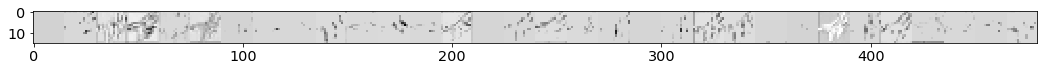

Displaying activation map 4


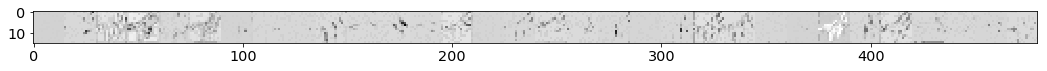

Displaying activation map 5


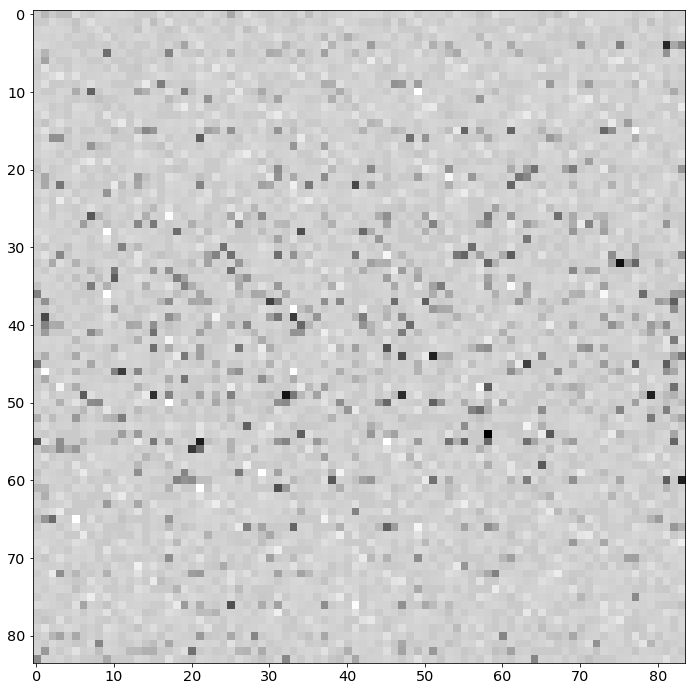

Displaying activation map 6


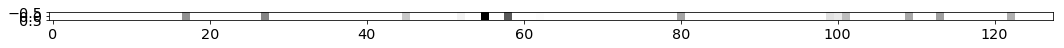

Displaying activation map 7


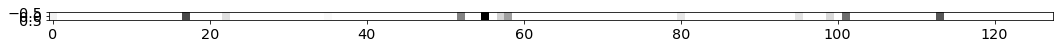

Displaying activation map 8


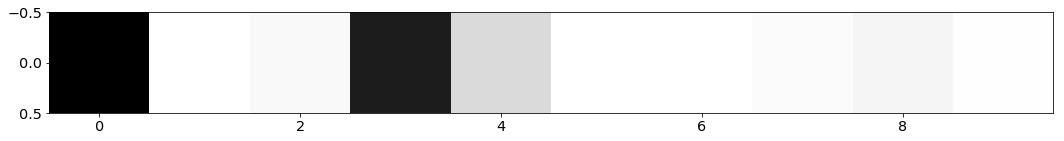

In [0]:
test_image_idx = 10
activations = utils.get_activations(model, x_test[test_image_idx].reshape(1,32,32,3))
utils.display_activations(activations)


In [0]:
pred_label = label_dict.get(model.predict_classes(x_test[test_image_idx].reshape(1,32,32,3)).argmax())
actual_label = label_dict.get(y_test[test_image_idx].argmax())
print('Actual Label={}\nPredicted Label={}'.format(actual_label,pred_label))


Actual Label=airplane
Predicted Label=airplane
